In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline
import seaborn as sns #Seaborn works well with pandas objects and not numpy. sns is the pseudonym for seaborn.
data = np.genfromtxt('CleanedUpCoreData.dat', skip_header=1)
core_dataframe = pd.DataFrame(data = data[:,1:5], columns = ['Porosity','TOC', 'Quartz','Calcite'])

In [2]:
core_dataframe.head()

,Porosity,TOC,Quartz,Calcite
0,6.67,4.15,38.6,0.0
1,6.07,4.25,48.6,6.2
2,4.91,3.40,41.0,2.5
3,6.00,0.39,4.6,66.4
4,5.63,3.90,37.0,0.6


In [3]:
core_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Porosity  167 non-null    float64
 1   TOC       167 non-null    float64
 2   Quartz    167 non-null    float64
 3   Calcite   167 non-null    float64
dtypes: float64(4)
memory usage: 5.3 KB


In [4]:
core_dataframe.describe()

,Porosity,TOC,Quartz,Calcite
count,167.000000,167.000000,167.000000,167.000000
mean,4.262934,3.770778,27.963473,12.122156
std,1.349560,1.625806,13.875863,19.819573
min,0.880000,0.390000,0.000000,0.000000
25%,3.405000,2.680000,17.450000,0.000000
50%,4.390000,3.900000,29.700000,2.400000
75%,5.205000,4.915000,38.300000,12.700000
max,8.050000,7.480000,59.400000,78.600000


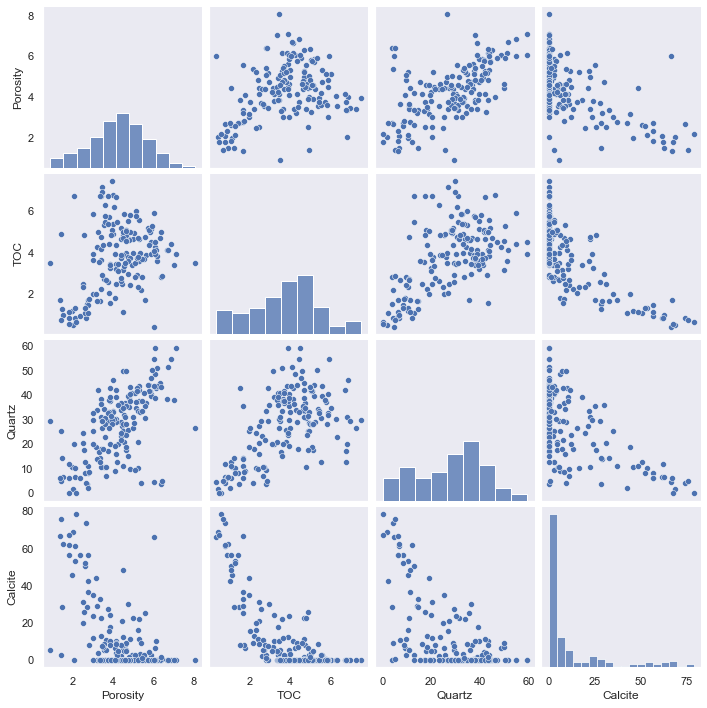

In [8]:
sns.set(style = 'dark') # Set the background to dark
sns.pairplot(core_dataframe) # Create a matrix scatterplot

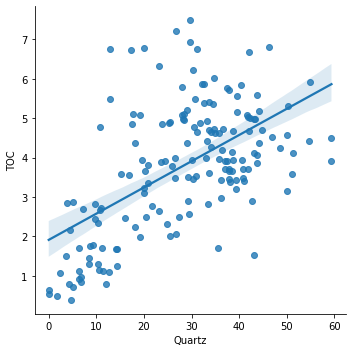

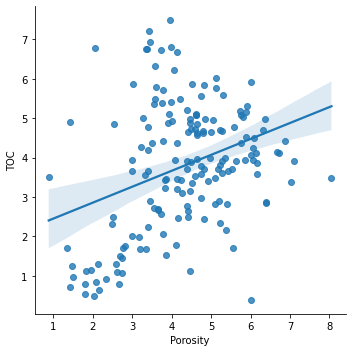

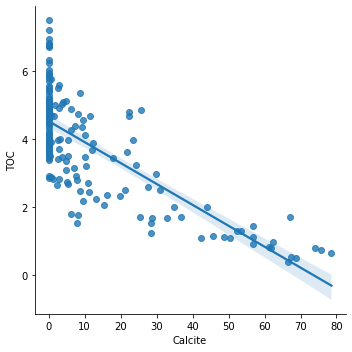

In [6]:
#Seaborn Residual Plots
#Let us also plot the residuals using a seaborn object for this. Seaborn can actually do regression!

sns.lmplot(x="Quartz", y="TOC", data=core_dataframe);
plt.show()
sns.lmplot(y="TOC", x="Porosity", data=core_dataframe);
plt.show()
sns.lmplot(x="Calcite", y='TOC', data=core_dataframe);
plt.show()

In [11]:
core_dataframe.columns

Index(['Porosity', 'TOC', 'Quartz', 'Calcite'], dtype='object')

In [14]:
y = core_dataframe['TOC']
x = core_dataframe[['Porosity', 'Quartz', 'Calcite']]
y

0      4.15
1      4.25
2      3.40
3      0.39
4      3.90
       ... 
162    2.06
163    3.52
164    2.47
165    2.32
166    3.66
Name: TOC, Length: 167, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(x, y , test_size=.2, random_state=42)

,Porosity,Quartz,Calcite
158,4.65,50.0,9.4
2,4.91,41.0,2.5
100,3.97,33.6,0.0
126,4.81,37.8,0.0
68,2.59,8.5,52.4
...,...,...,...
71,5.89,47.0,0.0
106,4.64,23.7,0.0
14,5.09,40.9,0.4
92,5.10,9.7,2.8


In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
lr.score(X_test, y_test)

0.7036373797291273

In [18]:
lr.score(X_train, y_train)

0.5854098579412317

In [29]:
lr_prediction = lr.predict(X_test)
MAE_lr = mean_absolute_error(y_test, lr_prediction)
MSE_lr = mean_squared_error(y_test, lr_prediction)
r2_lr = r2_score(y_test, lr_prediction)
print(f'mean absolute error of linear regression {MAE_lr}')
print(f'mean squared error of linear regression {MSE_lr}')
print(f'R2 score of linear regression {r2_lr}')

mean absolute error of linear regression 0.7417279369817055
mean squared error of linear regression 0.7939615100152165
R2 score of linear regression 0.7036373797291273


D:\work\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\work\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


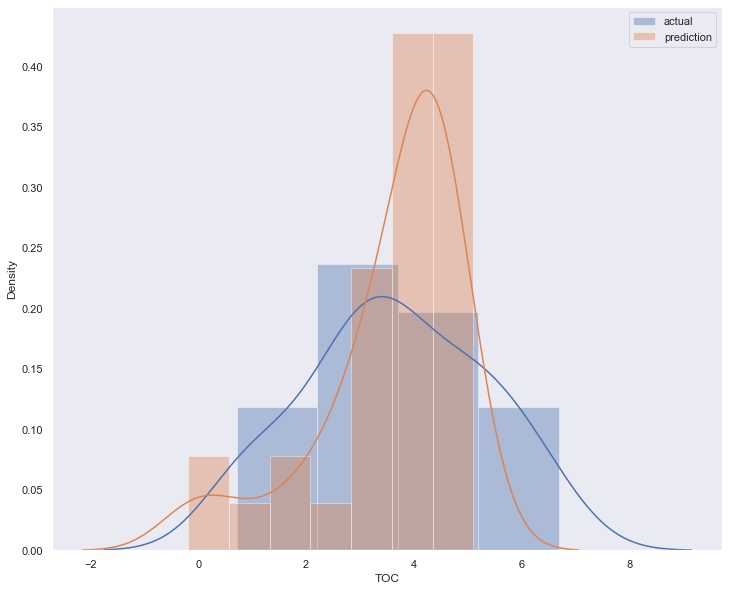

In [37]:
plt.figure(figsize=(12, 10))
sns.distplot(y_test, label='actual')
sns.distplot(lr_prediction, label = 'prediction')
plt.legend()
plt.show();

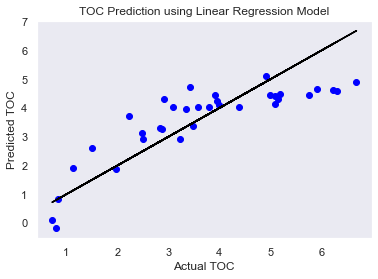

In [39]:
plt.scatter(y_test, lr_prediction, color = 'blue')
plt.xlabel('Actual TOC')
plt.ylabel('Predicted TOC')
plt.title('TOC Prediction using Linear Regression Model')
plt.plot(y_test, y_test, color = 'black')
plt.show()

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
print('Randon Forest score on train DataSet ', rf.score(X_train, y_train))

Randon Forest score on train DataSet  0.9425119572726272


In [31]:
rf_prediction = rf.predict(X_test)
MAE_rf = mean_absolute_error(y_test, rf_prediction)
MSE_rf = mean_squared_error(y_test, rf_prediction)
r2_rf = r2_score(y_test, rf_prediction)
print(f'mean absolute error of Random Forest regression {MAE_rf}')
print(f'mean squared error of Random Forest  regression {MSE_rf}')
print(f'R2 score of Random Forest regression {r2_rf}')

mean absolute error of Random Forest regression 0.6794882352941175
mean squared error of Random Forest  regression 0.7702704352941177
R2 score of Random Forest regression 0.7124805653153446


#### Comparision of Linear and random forest result

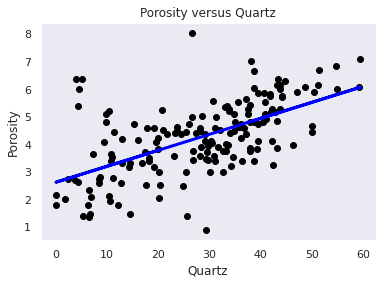

In [8]:
plt.scatter(Quartz, Porosity, color='black')
plt.xlabel('Quartz')
plt.ylabel('Porosity')
plt.title('Porosity versus Quartz')
Porosity_Predicted = 2.628 + 0.058*Quartz
plt.plot(Quartz, Porosity_Predicted, color='blue', linewidth=3)
plt.show()



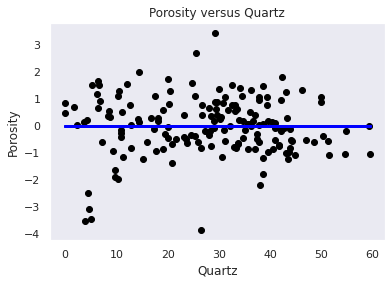

In [9]:
#Residuals Analysis

plt.scatter(Quartz, Porosity_Predicted - Porosity, color='black')
plt.xlabel('Quartz')
plt.ylabel('Porosity')
plt.title('Porosity versus Quartz')
horizontal_line = np.zeros(len(Porosity))
plt.plot(Quartz, horizontal_line, color='blue', linewidth=3)
plt.show()



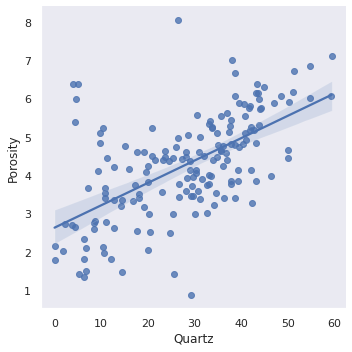

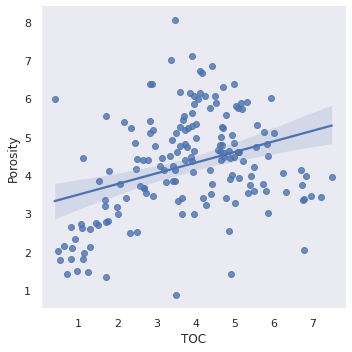

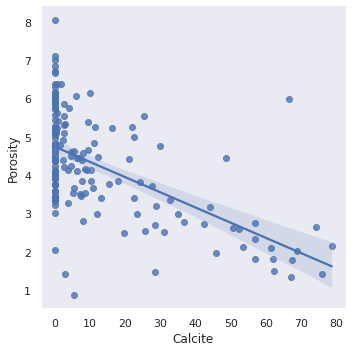

#Scikit Learn's Linear Regression
Scikit learn (https://scikit-learn.org/stable/) is one of the LR packages we will use in this course. It is an advanced data analysis
package with several utilities that you can use. In this case, we will use the linear regression option which is called linear_model. 

In [12]:

Porosity = data[:,1]
Quartz = data [:,3]
Quartz_LR = Quartz[:, np.newaxis]


In [13]:
#Define the model to use

X = Quartz_LR
Y = Porosity
# Create linear regression object
First_Regression = linear_model.LinearRegression()
# Train the model
First_Regression.fit(X, Y)
# What does the model predict?
Y_pred = First_Regression.predict(X)

Model slope:  0.05845595390715632
Model intercept: 2.628302639814196
Mean squared error: 1.16
R2: 0.36


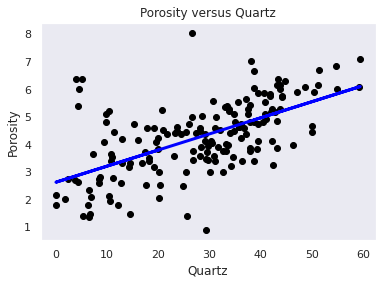

In [14]:
#Create the plot and output all regression coefficients
print("Model slope: ", First_Regression.coef_[0])
print("Model intercept:", First_Regression.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y, Y_pred))
# Print R2: 1 is perfect prediction
print('R2: %.2f' % r2_score(Y, Y_pred))
# Plot outputs
plt.scatter(X, Y, color='black')
plt.xlabel('Quartz')
plt.ylabel('Porosity')
plt.title('Porosity versus Quartz')
plt.plot(X, Y_pred, color='blue', linewidth=3)
plt.show()

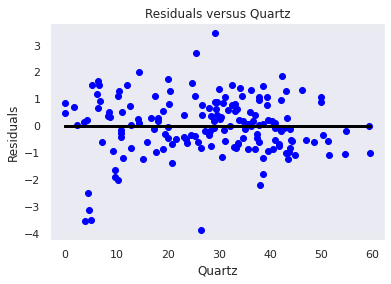

In [15]:
#Plot residuals
# Plot outputs
plt.scatter(X, Y_pred - Y, color='blue')
plt.xlabel('Quartz')
plt.ylabel('Residuals')
plt.title('Residuals versus Quartz')
St_line = np.zeros(len(X))
plt.plot(X, St_line, color='black', linewidth=3)
plt.show()

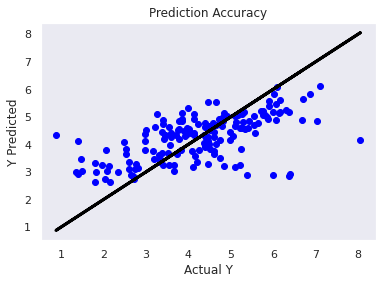

In [16]:
#Plot prediction accuracy
# Plot outputs
plt.scatter(Y, Y_pred, color='blue')
plt.xlabel('Actual Y')
plt.ylabel('Y Predicted')
plt.title('Prediction Accuracy')
plt.plot(Y, Y, color='black', linewidth=3)
plt.show()

In [17]:
#Creating a LR object
#With this function, you can regress on anything against anything as long as you properly define X and Y.

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score
def Class_Regression (X, Y):
  X LR X[ i ]
  X_LR = X[:, np.newaxis]

SyntaxError: ignored

In [18]:
def Class_Regression (X, Y):
  X_LR = X[ i ]
  X_LR = X[:, np.newaxis]
  

In [30]:
# Create linear regression object
First_Regression = linear_model.LinearRegression()
# Train the model
First_Regression.fit(X_LR, Y)
# What does the model predict?
Y_pred = First_Regression.predict(X_LR)
print("Model slope: ", First_Regression.coef_[0])
print("Model intercept:", First_Regression.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y, Y_pred))
# Print R2: 1 is perfect prediction
print('R2: %.2f' % r2_score(Y, Y_pred))
# Plot outputs
plt.scatter(X, Y, color='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Y versus X')
plt.plot(X, Y_pred, color='blue', linewidth=3)
plt.show()
# Plot outputs
plt.scatter(X, Y_pred - Y, color='blue')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals versus X')
St_line = np.zeros(len(X))
plt.plot(X, St_line, color='black', linewidth=3)
plt.show()# Plot outputs
plt.scatter(Y, Y_pred, color='blue')
plt.xlabel('Actual Y')
plt.ylabel('Y Predicted')
plt.title('Prediction Accuracy')
plt.plot(Y, Y, color='black', linewidth=3)
plt.show()
return First_Regression.coef_[0], First_Regression.intercept_, mean_squared_error(Y, Y_pred), r2_score(Y, Y_pred)

NameError: ignored

In [ ]:
#Porosity versus TOC
Porosity = data[:,2]
TOC = data [:,1]
TOC_LR = Quartz[:, np.newaxis]

In [22]:
X = TOC_LR
Y = Porosity
# Create linear regression object
First_Regression = linear_model.LinearRegression()
# Train the model
First_Regression.fit(X, Y)
# What does the model predict?
Y_pred = First_Regression.predict(X)

NameError: ignored

Model slope:  0.06651293837239836
Model intercept: 1.910845683202018
Mean squared error: 1.78
R2: 0.32


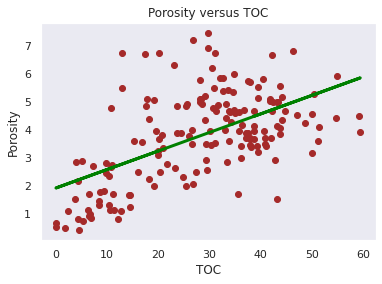

In [ ]:
#Create the plot and output all regression coefficients
print("Model slope: ", First_Regression.coef_[0])
print("Model intercept:", First_Regression.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y, Y_pred))
# Print R2: 1 is perfect prediction
print('R2: %.2f' % r2_score(Y, Y_pred))
# Plot outputs
plt.scatter(X, Y, color='brown')
plt.xlabel('TOC')
plt.ylabel('Porosity')
plt.title('Porosity versus TOC')
plt.plot(X, Y_pred, color='green', linewidth=3)
plt.show()

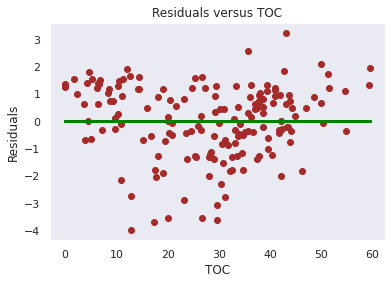

In [ ]:
#Plot residuals
# Plot outputs
plt.scatter(X, Y_pred - Y, color='brown')
plt.xlabel('TOC')
plt.ylabel('Residuals')
plt.title('Residuals versus TOC')
St_line = np.zeros(len(X))
plt.plot(X, St_line, color='green', linewidth=3)
plt.show()

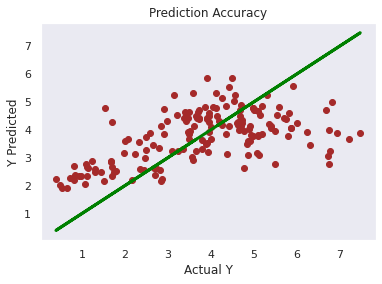

In [ ]:
#Plot prediction accuracy
# Plot outputs
plt.scatter(Y, Y_pred, color='brown')
plt.xlabel('Actual Y')
plt.ylabel('Y Predicted')
plt.title('Prediction Accuracy')
plt.plot(Y, Y, color='green', linewidth=3)
plt.show()

In [ ]:
#Porosity vs Calcite


In [ ]:
Porosity = data[:,2]
Calcite = data [:,3]
Calcite_LR = Quartz[:, np.newaxis]

In [ ]:
X = Calcite_LR
Y = Porosity
# Create linear regression object
First_Regression = linear_model.LinearRegression()
# Train the model
First_Regression.fit(X, Y)
# What does the model predict?
Y_pred = First_Regression.predict(X)

Model slope:  0.06651293837239836
Model intercept: 1.910845683202018
Mean squared error: 1.78
R2: 0.32


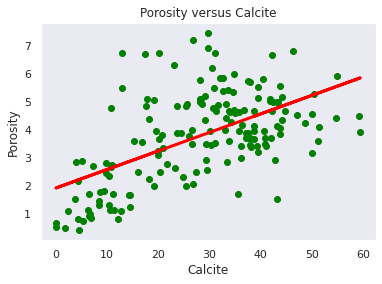

In [ ]:
#Create the plot and output all regression coefficients
print("Model slope: ", First_Regression.coef_[0])
print("Model intercept:", First_Regression.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y, Y_pred))
# Print R2: 1 is perfect prediction
print('R2: %.2f' % r2_score(Y, Y_pred))
# Plot outputs
plt.scatter(X, Y, color='green')
plt.xlabel('Calcite')
plt.ylabel('Porosity')
plt.title('Porosity versus Calcite')
plt.plot(X, Y_pred, color='red', linewidth=3)
plt.show()

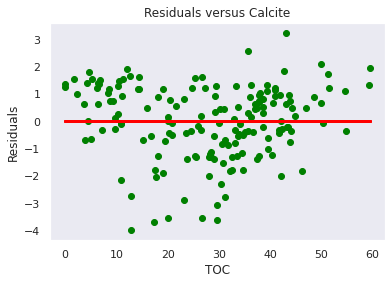

In [ ]:
#Plot residuals
# Plot outputs
plt.scatter(X, Y_pred - Y, color='green')
plt.xlabel('TOC')
plt.ylabel('Residuals')
plt.title('Residuals versus Calcite')
St_line = np.zeros(len(X))
plt.plot(X, St_line, color='red', linewidth=3)
plt.show()

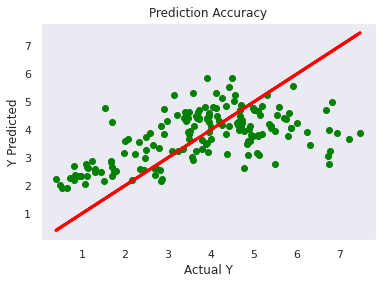

In [ ]:
#Plot prediction accuracy
# Plot outputs
plt.scatter(Y, Y_pred, color='green')
plt.xlabel('Actual Y')
plt.ylabel('Y Predicted')
plt.title('Prediction Accuracy')
plt.plot(Y, Y, color='red', linewidth=3)
plt.show()

In [ ]:
Logistic Regression

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, metrics
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error, r2_score
Porosity = data[:,1]
Quartz = data [:,3]
Quartz_LR = Quartz[:, np.newaxis]

In [20]:
  X = Quartz_LR
  Y = Porosity
# Create linear regression object
First_Regression = LogisticRegression()
# Train the model
First_Regression.fit(X, Y)
# What does the model predict?
Y_pred = First_Regression.predict(X)

ValueError: ignored

In [21]:
print("Model slope: ", First_Regression.coef_[0])
print("Model intercept:", First_Regression.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y, Y_pred))
# Print R2: 1 is perfect prediction
print('R2: %.2f' % r2_score(Y, Y_pred))
# Plot outputs
plt.scatter(X, Y, color='black')
plt.xlabel('Quartz')
plt.ylabel('Porosity')
plt.title('Porosity versus Quartz')
plt.plot(X, Y_pred, color='blue', linewidth=3)
plt.show()

AttributeError: ignored

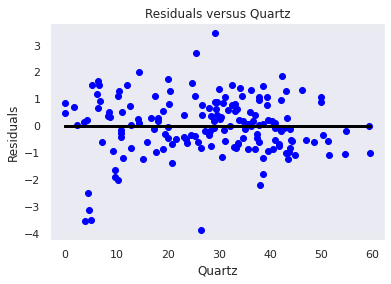

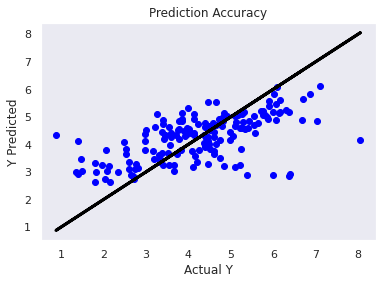

In [31]:
# Plot outputs
plt.scatter(X, Y_pred - Y, color='blue')
plt.xlabel('Quartz')
plt.ylabel('Residuals')
plt.title('Residuals versus Quartz')
St_line = np.zeros(len(X))

plt.plot(X, St_line, color='black', linewidth=3)
plt.show()
# Plot outputs
plt.scatter(Y, Y_pred, color='blue')
plt.xlabel('Actual Y')
plt.ylabel('Y Predicted')
plt.title('Prediction Accuracy')
plt.plot(Y, Y, color='black', linewidth=3)
plt.show()

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
def Class_Regression (X, Y):
  X_LR = X[:, np.newaxis]
  # Create linear regression object
  Second_Regression = LogisticRegression()
  # Train the model
  Second_Regression.fit(X_LR, Y)
  # What does the model predict?
  Y_pred_Log = Second_Regression.predict(X_LR)

  print("Model slope: ", Second_Regression.coef_[0])
  print("Model intercept:", Second_Regression.intercept_)

  # The mean squared error
  print("Mean squared error: %.2f" % mean_squared_error(Y, Y_pred_Log))
  # Print R2: 1 is perfect prediction
  print('R2: %.2f' % r2_score(Y, Y_pred_Log))
  # Plot outputs
  plt.scatter(X, Y, color='black')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Y versus X')
  plt.plot(X, Y_pred_Log, color='blue', linewidth=3)
  plt.show()
  # Plot outputs
  plt.scatter(X, Y_pred_Log - Y, color='blue')
  plt.xlabel('X')
  plt.ylabel('Residuals')
  plt.title('Residuals versus X')
  St_line = np.zeros(len(X))
  plt.plot(X, St_line, color='black', linewidth=3)
  plt.show()
  # Plot outputs
  plt.scatter(Y, Y_pred_Log, color='blue')
  plt.xlabel('Actual Y')
  plt.ylabel('Y Predicted')
  plt.title('Prediction Accuracy')
  plt.plot(Y, Y, color='black', linewidth=3)
  plt.show()
  return First_Regression.coef_[0], First_Regression.intercept_, mean_squared_error(Y, Y_pred), r2_score(Y, Y_pred)

  

In [43]:
slope, intercept, MSE, R2 = Class_Regression(TOC, Porosity)

slope, intercept, MSE, R2 = Class_Regression(Calcite, Porosity)
 

ValueError: ignored

In [36]:
return Second_Regression.coef_[0], Second_Regression.intercept_, mean_squared_error(Y, Y_pred_Log), r2_score(Y, Y_pred_

SyntaxError: ignored